
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy import e, log 
import seaborn as sns
from itertools import combinations
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('titanic.csv')


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### we can clear see from the information of the data set that there are some null vallues(`NAN`) in certain columns such as `Age, cabin, Embarked`

In [ ]:
## Reference :https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


#### We can remove cabin feature entirely since it contains many null values, so it will not contribute much to our model  since almost around 77 percent are missing. For the remaining we need to fill with some values

### A  lot of the features were categorical. So, we need to encode then before we proceed to the model

In [ ]:
headers=df.columns.values
print(headers)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### From the above header information we can assume that passenger id , ticket and Name almost unique to each individual and doesnot play any role in classifying whether the person survived or not ,it is difficult to convert some of the categorical data like name and Tickets to integer data is difficult(a large number os categories is undesirable ).  SO, we can safely drop those features from our dataset 

In [ ]:
cols=['PassengerId','Name','Ticket','Cabin']
df=df.drop(cols,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### from the above we can see that Age has only 714 values as non-null and the remaining are NAN. So we will try to fill those values using interpolate function 

In [ ]:
df['Age'] = df['Age'].interpolate()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### It is clear that we need to convert the categorical features(sex,Embarked ) to numerical values we can do it by mapping them to some unique values or we can generate dummies using pandas function. We'll create dummies in this since it increases dimensions also 

In [ ]:
dummies = []
cols = ['Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

In [ ]:
titanic_dummies = pd.concat(dummies, axis=1)
df = pd.concat((df,titanic_dummies), axis=1)

### Dropping the categorical columns since we already creates the dummies for them

In [ ]:
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   female    891 non-null    uint8  
 6   male      891 non-null    uint8  
 7   C         891 non-null    uint8  
 8   Q         891 non-null    uint8  
 9   S         891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [ ]:
corrM = df.corr()
corrM

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S
Survived,1.000000,-0.062164,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Age,-0.062164,1.000000,-0.213410,-0.170013,0.087119,-0.061332,0.061332,0.015818,0.019004,-0.033069
SibSp,-0.035322,-0.213410,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,-0.170013,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,0.087119,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
female,0.543351,-0.061332,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
male,-0.543351,0.061332,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
C,0.168240,0.015818,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Q,0.003650,0.019004,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624
S,-0.155660,-0.033069,0.070941,0.063036,-0.166603,-0.125722,0.125722,-0.778359,-0.496624,1.000000


In [ ]:
"""Converting data frames to numpy  """

X = df.values
y = df['Survived'].values

## Removing the column of the target variable 

X = np.delete(X, 1, axis=1)



In [ ]:
"""Using Train test split to divide the data """

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))
print(y_train.ndim)

#if y_train.ndim==1:
#  print(True)

(623, 9)
(268, 9)
(623,)
(268,)
1


## Using the Logistic regression algorithm developed in the question2 

In [ ]:
""" Reference :https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17
    some of the code is referred from the above website """

class LogReg:
  """ ovr stands for one vs all or one vs rest and ovo stands for one vs one """
  def __init__(self,learning_rate=0.1,iterations=3000,epochs=20,classify=0,mode="ovr",class1=0,class2=1):

    self.theta=None
    self.learning_rate=learning_rate
    self.iterations=iterations
    self.classify=classify 
    self.mode=mode
    self.epochs=epochs
    self.class1=class1
    self.class2=class2
    self.theta_classes=[]


  def sigmoid(self,z):
    return 1 / (1 + e**(-z))

  def cost_func(self,X,y,theta):
    """ computing likelihood cost """
    X=X.T
    z=np.dot(theta,X)

    pred_1=y*log(self.sigmoid(z))
    pred_0=(1-y)*log(1-self.sigmoid(z))

    return -sum(pred_1+pred_0)/len(X_train)

  def initialise_theta(self,X):
    theta=np.random.rand(1,X.shape[0])
    self.theta=theta.reshape(1,X.shape[0])
    for i in range(2):
      theta=np.random.rand(1,X.shape[0])
      self.theta_classes.append(theta.reshape(1,X.shape[0]))
    self.theta_classes=np.array(self.theta_classes)
    #print("inside: ",self.theta_classes )
    

  def fit(self,X,Y):

    y=[]
    X=X.T
    self.initialise_theta(X)
    if self.mode=="ovr":

      if np.array(Y).ndim==1:
          Y=np.array(Y).reshape(np.array(Y).shape[0],1)
      y=[[1 if y[int(self.classify)]==1 else 0 for y in Y ]]
      y=np.transpose(np.array(y))
      for i in range(self.iterations):
      
        y_pred=self.sigmoid(np.dot(self.theta,X))
        y_pred=np.transpose(np.array(y_pred))
      
        temp=np.dot(X,(y-y_pred)).T
        self.theta+=(self.learning_rate*temp)/(X.shape[0])
    if self.mode=="ovo":
      list_classes=[self.class1,self.class2]
      best_theta=self.theta
      for s,cls in enumerate(list_classes):
        if np.array(Y).ndim==1:
          Y=np.array(Y).reshape(np.array(Y).shape[0],1)
        y=[[1 if y[int(cls)]==1 else 0 for y in Y ]]
        y=np.transpose(np.array(y))
      ## here is a trouble that we need to perform each class individually and return two y_preds     
        #for j in range(self.epochs):
        for i in range(self.iterations):
          
          y_pred=self.sigmoid(np.dot(self.theta_classes[s],X))
          y_pred=np.transpose(np.array(y_pred))
        
          temp=np.dot(X,(y-y_pred)).T
          #print("inside loop:",self.theta_classes )
          self.theta_classes[s]+=(self.learning_rate*temp)/(X.shape[0])
      

  def predict(self, X):

    #X=X.T
    if self.mode=="ovr":
      w=self.theta
      y_pred = np.round(self.sigmoid(np.dot(X,w.T))).astype(int)
      return y_pred
    if self.mode=="ovo" or not (self.class1==0 and self.class2==0):
      #print("I entered here")
      y_pred=[None]*2
      for i in range(2):
        w=self.theta_classes[i]
        y_pred[i]=np.round(self.sigmoid(np.dot(X,w.T))).astype(int)
      return y_pred



In [ ]:

max_score=0
k=0
lg=LogReg(classify=k,mode="ovr")
lg.fit(X_train,y_train)


y_pred=lg.predict(X_test)



In [ ]:
print(np.shape(y_pred))
test=y_test.reshape(y_pred.shape[0],1)
print(np.shape(y_test))

(268, 1)
(268,)


Accuracy for class 0 = 88.80597014925372 % 
##################Confusion matrix#################
[[140  28]
 [  2  98]]
Mean accuracy of the model is 88.80597014925372 


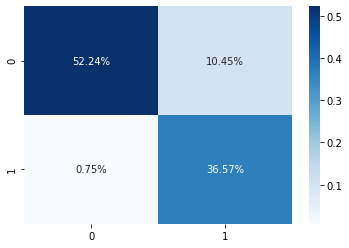

In [ ]:
score=0
for i,j in zip(test,y_pred):
  if i==j:
    score+=1
print("Accuracy for class {} = {} % ".format(k,100*score/len(test)))
cf_matrix = confusion_matrix(test, y_pred)

#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
print("##################Confusion matrix#################")
print(cf_matrix)  
#sns.heatmap(cf_matrix, annot=True)


accuracies=100*score/len(test)

#cf_matrix=final_cf_matrix
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

accuracies=np.array(accuracies)
print("Mean accuracy of the model is {} ".format(np.mean(accuracies)))

In [ ]:
y_pred=y_pred.reshape(y_pred.shape[0])
target_names = ['Not Survived', 'Survive']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.99      0.83      0.90       168
     Survive       0.78      0.98      0.87       100

    accuracy                           0.89       268
   macro avg       0.88      0.91      0.89       268
weighted avg       0.91      0.89      0.89       268



In [ ]:
logisticRegr = LogisticRegression(multi_class="auto")

In [ ]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logisticRegr.predict(X_test)

In [ ]:
score = logisticRegr.score(X_test, y_test)
print(score)

1.0


#############confusion matrix#############
[[168   0]
 [  0 100]]


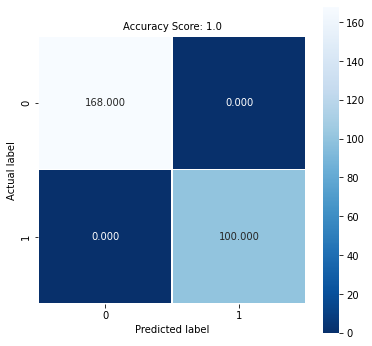

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print("#############confusion matrix#############")
print(cm)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);

In [ ]:
target_names = ['Not Survived', 'Survived']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00       168
    Survived       1.00      1.00      1.00       100

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



## Observations:
From the above two implementations we can see that both the models have high accuracy because of the all the data cleaning and preprocessing that we did in the above steps 